#UNIT 11 대중교통 데이터 시각화하기

##1.대중교통 데이터 내려 받기
먼저 수도권 대중 교통 데이터는 국가 기관이 아닌 티머니 홈페이지에서 제공합니다.
\[[티머니 홈페이지](https://www.t-money.co.kr)\]에 접속한 후 **이용안내**를 선택합니다.

"이용 안내 메인" 창에서 "**대중교통 통계자료**"를 선택합니다.그리고 "**20xx년 xx월 교통카드 통계자료**"를 다운로드 받습니다.

다운로드 받은 파일을 더블 클릭하여 excel로 열어서 내용을 살펴보겠습니다.


다운로드 받은 파일에는 4개의 탭이 있는데 각각 "버스정류장별 이용현황", "지하철 노선별 역별 이용현황", "지하철 유무임별 이용현황", "지하철 시간대별 이용현황"으로 sheet가 나누어져 있습니다.

##2. 지하철 유무임별 이용현황 데이터 정제하기(데이터 전처리)
다운로드 받은 파일을 보면 4개의 탭이 있고 그중에 "지하철 유무임별 이용현황" 탭이 있습니다. 
- 단계 1 : '작업 일시' 열을 삭제하십시요. 우리는 이 열의 데이터를 사용하지 않을 것이기 때문입니다. 

<center>

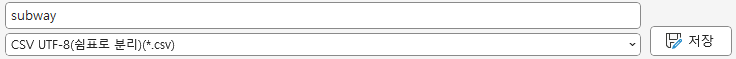
</center>

- 단계 2 : '작업 일시' 열을 삭제하십시요. 우리는 이 열의 데이터를 사용하지 않을 것이기 때문입니다. 
- 단계 3 : 유임승차, 유임하차, 무임승차, 무임승차 열에 해당하는 셀의 속성을 **일반**로 변경하세요. 의도는 정수를 표현하면서 자릿수를 구분하기 위한 쉼표(,)를 제거 하기 위해서 입니다. 그리고 파일을 다시 저장하세요.

<center>

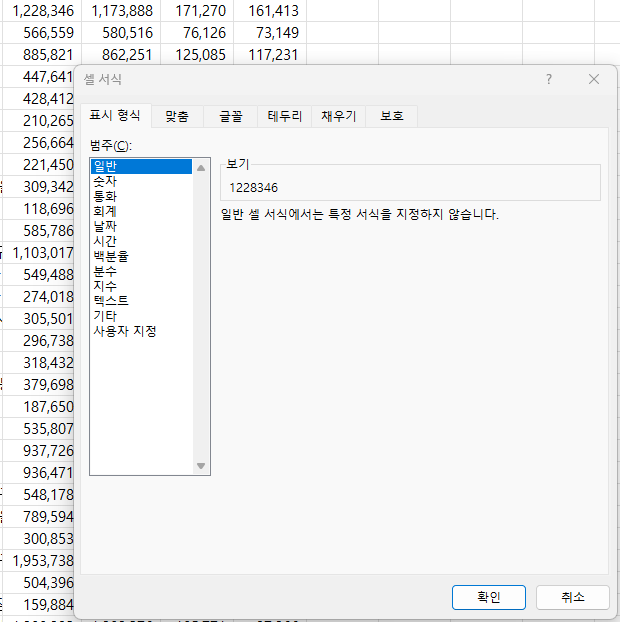

</center>

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

for row in data:
  print(row)

f.close()

['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jan-23', '1호선', '150', '서울역', '1228346', '1173888', '171270', '161413']
['Jan-23', '1호선', '151', '시청', '566559', '580516', '76126', '73149']
['Jan-23', '1호선', '152', '종각', '885821', '862251', '125085', '117231']
['Jan-23', '1호선', '153', '종로3가', '447641', '411958', '271449', '251592']
['Jan-23', '1호선', '154', '종로5가', '428412', '424366', '217290', '209180']
['Jan-23', '1호선', '155', '동대문', '210265', '198163', '104059', '102142']
['Jan-23', '1호선', '156', '신설동', '256664', '248625', '104780', '100582']
['Jan-23', '1호선', '157', '제기동', '221450', '215567', '266914', '289322']
['Jan-23', '1호선', '158', '청량리(서울시립대입구)', '309342', '305961', '242454', '243890']
['Jan-23', '1호선', '159', '동묘앞', '118696', '125235', '129707', '132735']
['Jan-23', '2호선', '201', '시청', '585786', '558820', '49461', '45261']
['Jan-23', '2호선', '202', '을지로입구', '1103017', '1132715', '92071', '86397']
['Jan-23', '2호선', '203', '을지로3가', '549488', '555415', '70676

출력 결과를 살펴보니 맨 첫줄에 헤더(header) 데이터가 들어 있습니다. 헤더 데이터를 읽어서 버리겠습니다. (읽은 후에 보관하지 않음) 

```python
['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
```

In [ ]:
f = open('subway.csv')
data = csv.reader(f)

next(data)

for row in data:
  print(row)
  
f.close()

['Jan-23', '1호선', '150', '서울역', '1228346', '1173888', '171270', '161413']
['Jan-23', '1호선', '151', '시청', '566559', '580516', '76126', '73149']
['Jan-23', '1호선', '152', '종각', '885821', '862251', '125085', '117231']
['Jan-23', '1호선', '153', '종로3가', '447641', '411958', '271449', '251592']
['Jan-23', '1호선', '154', '종로5가', '428412', '424366', '217290', '209180']
['Jan-23', '1호선', '155', '동대문', '210265', '198163', '104059', '102142']
['Jan-23', '1호선', '156', '신설동', '256664', '248625', '104780', '100582']
['Jan-23', '1호선', '157', '제기동', '221450', '215567', '266914', '289322']
['Jan-23', '1호선', '158', '청량리(서울시립대입구)', '309342', '305961', '242454', '243890']
['Jan-23', '1호선', '159', '동묘앞', '118696', '125235', '129707', '132735']
['Jan-23', '2호선', '201', '시청', '585786', '558820', '49461', '45261']
['Jan-23', '2호선', '202', '을지로입구', '1103017', '1132715', '92071', '86397']
['Jan-23', '2호선', '203', '을지로3가', '549488', '555415', '70676', '69456']
['Jan-23', '2호선', '204', '을지로4가', '274018', '281698', '7

출력 결과를 살펴 보니 ```row```는 리스트형 데이터이고 이 리스트의 각 요소는 문자열 데이터인 것을 확인할 수 있습니다. 이 리스트의 인덱스 4부터 7까지는 숫자이므로 정수로 변환을 해야겠습니다. 

In [ ]:
f = open('subway.csv')
data = csv.reader(f)

next(data)

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  print(row)
  
f.close()

['Jan-23', '1호선', '150', '서울역', 1228346, 1173888, 171270, 161413]
['Jan-23', '1호선', '151', '시청', 566559, 580516, 76126, 73149]
['Jan-23', '1호선', '152', '종각', 885821, 862251, 125085, 117231]
['Jan-23', '1호선', '153', '종로3가', 447641, 411958, 271449, 251592]
['Jan-23', '1호선', '154', '종로5가', 428412, 424366, 217290, 209180]
['Jan-23', '1호선', '155', '동대문', 210265, 198163, 104059, 102142]
['Jan-23', '1호선', '156', '신설동', 256664, 248625, 104780, 100582]
['Jan-23', '1호선', '157', '제기동', 221450, 215567, 266914, 289322]
['Jan-23', '1호선', '158', '청량리(서울시립대입구)', 309342, 305961, 242454, 243890]
['Jan-23', '1호선', '159', '동묘앞', 118696, 125235, 129707, 132735]
['Jan-23', '2호선', '201', '시청', 585786, 558820, 49461, 45261]
['Jan-23', '2호선', '202', '을지로입구', 1103017, 1132715, 92071, 86397]
['Jan-23', '2호선', '203', '을지로3가', 549488, 555415, 70676, 69456]
['Jan-23', '2호선', '204', '을지로4가', 274018, 281698, 72790, 71775]
['Jan-23', '2호선', '205', '동대문역사문화공원(DDP)', 305501, 349119, 47632, 51389]
['Jan-23', '2호선', '206'

리스트 형 데이터의 각 요소의 의미를 확인하게 위해, 해더 정보를 다시 확인하겠습니다.


```python
['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
```

무임승차라.... 2023년 1월(Jan-23) 가장 무임승차를 많이 한 역은 어디일까요? 

##3. 유임승차 비율이 가장 높은 역은 어디일까요?
이제 이 데이터에서 어떤 정보를 가져올 수 있을지 생각해 보겠습니다. 유임 승차 비율이 가장 높은 또는 가장 낮은 역이 어디인지 궁금하네요. 무임 승차 인원 대비 유임승차 인원의 비율이 얼마나 되는지 생각할 수 있을 것입니다. 예를 들어 10명의 유임 승차를 했고 4명이 무임 승차를 했다면 무임 승차 인원 대비 유임 승차 인원의 비율은 무임 승차 인원의 2.5배(10/4)가 됩니다. 이와 같은 방식으로 유임승차율을 식(11-1)과 같이 정의하겠습니다. 

$$유임 승차 인원의 비율 = 유임승차인원/무임승차인원 \tag{식 11-1}$$


그렇다면 이제 어떤 작업부터 해야하는지 생각해 보겠습니다. 

1. 테이터를 읽어 온다.
2. 필요시 데이터를 정제(데이터 전처리)를 한다.
3. 모든 역의 데이터를 바탕으로 각 역의 유임승차율을 구한다.
4. 무임승차율이 가장 높은 역과 가장 낮은 역을 찾는다.
5. 적절한 시각화 방법으로 보고서에 들어갈 그래프를 그린다.


과정 1(과정 2)를 위한 코드를 먼저 보겠습니다. 

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  print(row)
  
f.close()

['Jan-23', '1호선', '150', '서울역', 1228346, 1173888, 171270, 161413]
['Jan-23', '1호선', '151', '시청', 566559, 580516, 76126, 73149]
['Jan-23', '1호선', '152', '종각', 885821, 862251, 125085, 117231]
['Jan-23', '1호선', '153', '종로3가', 447641, 411958, 271449, 251592]
['Jan-23', '1호선', '154', '종로5가', 428412, 424366, 217290, 209180]
['Jan-23', '1호선', '155', '동대문', 210265, 198163, 104059, 102142]
['Jan-23', '1호선', '156', '신설동', 256664, 248625, 104780, 100582]
['Jan-23', '1호선', '157', '제기동', 221450, 215567, 266914, 289322]
['Jan-23', '1호선', '158', '청량리(서울시립대입구)', 309342, 305961, 242454, 243890]
['Jan-23', '1호선', '159', '동묘앞', 118696, 125235, 129707, 132735]
['Jan-23', '2호선', '201', '시청', 585786, 558820, 49461, 45261]
['Jan-23', '2호선', '202', '을지로입구', 1103017, 1132715, 92071, 86397]
['Jan-23', '2호선', '203', '을지로3가', 549488, 555415, 70676, 69456]
['Jan-23', '2호선', '204', '을지로4가', 274018, 281698, 72790, 71775]
['Jan-23', '2호선', '205', '동대문역사문화공원(DDP)', 305501, 349119, 47632, 51389]
['Jan-23', '2호선', '206'

과정 1(과정 2)에 대한 작업 후 과정 2에 대한 작업으로 각 역에 대한 유임 승차 인원의 비율를 구하는 코드를 추가하겠습니다.  유임 승차 인원의 비율은 식(11-1)에서 정의했었습니다. 기억을 상기시키기 위해 다시 유임 승차 인원의 비율을 써 보겠습니다. 

$$유임 승차 인원의 비율 = 유임승차인원/무임승차인원$$



```python
['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
```
과정 3에 해당하는 작업을 해보겠습니다. 유임 승차 인원의 비율을 구하기 위해서는 유임승차 인원과 무임승차 인원 정보를 알아야 합니다.



In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  rate.append( row[4]/row[6] )
  name_station.append(row[3])

f.close()

ZeroDivisionError: ignored

위 코드는 경우에 따라 "ZeroDivisionError"에러를 발생시킬 것입니다. 위 코드 셀의 14번째 라인에서 나누기 연산이 시행되는데, 0으로 어떤 값을 나누려는 시도가 있었다고 알려주고 있습니다. 즉 ```row[6]```의 값이 0이다라는 것이군요. ```row[6]```은 무임승차 인원입니다. 즉 어떤 역에서는 무임 승차 인원이 0명이라는 것이네요. 바로 위 코드 셀의 코드를 수정해서 무임 승차 인원이 0명인 역이 어느 역인지 살펴보겠습니다. 

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  if int(row[6]) == 0:
    print(row[3])

f.close()

창동
지축
계양
검암
신내


창동, 지축, 계양, 검안, 신내역에서 2023년 1월 한 달 내 무임승차 인원이 0명이라는 사실이 놀랍습니다. ㅎㅎㅎ 일단 무임 승차 인원이 0 명인 곳을 제외하고 식(11-1)에서 정의한 무임승차 인원 대비 유임 승차 인원 비율를 각 역 마다 계산해 보겠습니다. 


In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  if row[6] != 0:
    rate.append( row[4]/row[6] )
    name_station.append(row[3])

for idx in range(len(name_station)):
  print('{} : {}%'.format(name_station[idx], rate[idx]*100))

f.close()

서울역 : 717.1985753488643%
시청 : 744.2384993300581%
종각 : 708.1752408362314%
종로3가 : 164.9079569274523%
종로5가 : 197.16139721110036%
동대문 : 202.06325257786446%
신설동 : 244.95514411147164%
제기동 : 82.96679829458178%
청량리(서울시립대입구) : 127.58791358360762%
동묘앞 : 91.51086679978721%
시청 : 1184.3391763207376%
을지로입구 : 1198.0069728796257%
을지로3가 : 777.4746731563756%
을지로4가 : 376.4500618216788%
동대문역사문화공원(DDP) : 641.3776452804836%
신당 : 354.1660201706749%
상왕십리 : 526.4644126642969%
왕십리(성동구청) : 820.7024748730141%
한양대 : 1661.060458528813%
뚝섬 : 1068.7284332302784%
성수 : 998.8985470194725%
건대입구 : 1156.2797876281022%
구의(광진구청) : 581.6644206996807%
강변(동서울터미널) : 779.0764676862358%
잠실나루 : 395.5469366289771%
잠실(송파구청) : 1094.2797452685936%
잠실새내 : 507.35387308005676%
종합운동장 : 423.26467940911743%
삼성(무역센터) : 1229.4409620784527%
선릉 : 658.5650085562124%
역삼 : 909.8408334978661%
강남 : 1465.7088366179275%
교대(법원.검찰청) : 528.1358363339274%
서초 : 671.2343948194138%
방배 : 526.8542083941991%
사당 : 505.79343933533875%
낙성대(강감찬) : 679.9551092236845%

비율 값에 소수점 이하 숫자가 너무 많네요. 적절한 위치에서 반올림하면 좋겠습니다.그렇다면 무임 승차 인원 대비 유임 승차 인원의 비율 값을 소수점 두 째자리까지만 출력하도록 코드를 수정하겠습니다.
```
pi = 3.1415
print('{:.2f}'.format(pi))
```

In [ ]:
pi = 3.1415
print('{:.2f}'.format(pi))
print('{:.3f}'.format(pi))    # 그 아래 자릿수에서 반올림하네요요

3.14
3.142


In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  if row[6] != 0:
    rate.append( row[4]/row[6] )
    name_station.append(row[3])

for idx in range(len(name_station)):
  print('{} : {:.2f}%'.format(name_station[idx], rate[idx]*100))

f.close()

서울역 : 717.20%
시청 : 744.24%
종각 : 708.18%
종로3가 : 164.91%
종로5가 : 197.16%
동대문 : 202.06%
신설동 : 244.96%
제기동 : 82.97%
청량리(서울시립대입구) : 127.59%
동묘앞 : 91.51%
시청 : 1184.34%
을지로입구 : 1198.01%
을지로3가 : 777.47%
을지로4가 : 376.45%
동대문역사문화공원(DDP) : 641.38%
신당 : 354.17%
상왕십리 : 526.46%
왕십리(성동구청) : 820.70%
한양대 : 1661.06%
뚝섬 : 1068.73%
성수 : 998.90%
건대입구 : 1156.28%
구의(광진구청) : 581.66%
강변(동서울터미널) : 779.08%
잠실나루 : 395.55%
잠실(송파구청) : 1094.28%
잠실새내 : 507.35%
종합운동장 : 423.26%
삼성(무역센터) : 1229.44%
선릉 : 658.57%
역삼 : 909.84%
강남 : 1465.71%
교대(법원.검찰청) : 528.14%
서초 : 671.23%
방배 : 526.85%
사당 : 505.79%
낙성대(강감찬) : 679.96%
서울대입구(관악구청) : 689.57%
봉천 : 389.80%
신림 : 784.44%
신대방 : 529.05%
구로디지털단지 : 837.17%
대림(구로구청) : 479.22%
신도림 : 628.17%
문래 : 651.54%
영등포구청 : 543.53%
당산 : 828.66%
합정 : 1365.55%
홍대입구 : 2114.71%
신촌 : 810.52%
이대 : 773.01%
아현 : 374.41%
충정로(경기대입구) : 504.51%
용답 : 400.55%
신답 : 406.28%
신설동 : 256.60%
도림천 : 387.49%
양천구청 : 318.90%
신정네거리 : 339.01%
용두(동대문구청) : 207.66%
지축 : 500.98%
구파발 : 435.09%
연신내 : 321.42%
불광 : 251.03%
녹번 : 492.5

#####Quiz
식(11-1)에서 정의한 무임 승차 인원 대비 유임 승차 인원 비율이 가장 높은 역은 어디입니까? 

프로그램 코드를 작성하셔서 확인해보시죠.

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  if row[6] != 0:
    rate.append( row[4]/row[6] )
    name_station.append(row[3])

f.close()

for idx in range(len(rate)):
  if rate[idx] == max(rate):
    print(name_station[idx],':', rate[idx]*100, '%')
  

21.461301059001514
홍대입구 : 2146.130105900151 %


위 코드셀의 코드를 ```index()```함수를 사용해서 약간 수정하겠습니다.

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  if row[6] != 0:
    rate.append( row[4]/row[6] )
    name_station.append(row[3])

f.close()
midx = rate.index(max(rate))
print(name_station[midx],' :'+ str( max(rate)*100)+'%')


홍대입구  :2146.130105900151%


**짬깐만요!**  
홍대입구역이 최고~? 무임승차인원이 한 명도 없는, 무임승차 인원의 수가 0인 역이 있었습니다. 식(11-1)에서 무임승차 인원 수 대비 유임 승차 인원 수로 정의한 비율이 좀 마음에 안드네요. 식(11-1)을 변경하여 식(11-2)와 같이, 비율을 다시 정의하겠습니다. 

$$ 비율 = 유임승차인원/전체(유임+무임)인원 \tag{11-2}$$

위 식(11-2)에서 분모가 0이 되는 경우는 없다고 봐도 될 것 같으니 아래와 같이 코드를 수정하겠습니다.

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  
  rate.append( row[4]/(row[4] + row[6]) )
  name_station.append(row[3])

f.close()

for idx in range(len(rate)):
  if rate[idx] == max(rate):
    print(name_station[idx],':', rate[idx]*100, '%')
  

창동 : 100.0 %
지축 : 100.0 %
계양 : 100.0 %
검암 : 100.0 %
신내 : 100.0 %


#### Quiz
식(11-2)에서 정의한 비율이 0.95(95%) 이상인 역의 이름과 비율을 출력하는 코드를 작성하세요.

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  
  rate.append( row[4]/(row[4] + row[6]) )
  name_station.append(row[3])

f.close()

for idx in range(len(rate)):
  if rate[idx] >= 0.95:
    print(name_station[idx],':', rate[idx]*100, '%')
  

홍대입구 : 95.48473425087491 %
서울역 : 95.48530360545544 %
창동 : 100.0 %
복정 : 95.0 %
지축 : 100.0 %
계양 : 100.0 %
검암 : 100.0 %
연신내 : 95.23809523809523 %
신내 : 100.0 %
홍대입구 : 95.5478981499193 %


#####Quiz
왜 **홍대입구**역이 두 번 출력되었을까요?

In [ ]:
import csv

f = open('subway.csv')
data = csv.reader(f)

next(data)

rate = []
name_station =[]
name_line =[]

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
  
  rate.append( row[4]/(row[4] + row[6]) )
  name_station.append(row[3])
  name_line.append(row[1])

f.close()

for idx in range(len(rate)):
  if rate[idx] >= 0.95:
    print( name_line[idx] + '-' + name_station[idx],':', rate[idx]*100, '%')
  

2호선-홍대입구 : 95.48473425087491 %
경부선-서울역 : 95.48530360545544 %
경원선-창동 : 100.0 %
분당선-복정 : 95.0 %
일산선-지축 : 100.0 %
경의선-계양 : 100.0 %
경의선-검암 : 100.0 %
6호선-연신내 : 95.23809523809523 %
6호선-신내 : 100.0 %
공항철도 1호선-홍대입구 : 95.5478981499193 %


##4. 유무임 승하차 인원이 가장 많은 지역을 어디일까요?

유임이든 무입이든, 승차 인원이든 하차 인원이든 그러니까 전체 이용객 수가 가장 많은 지하철 역은 어디일까요?

1. 테이터를 읽어 온다.
2. 필요시 데이터를 정제(데이터 전처리)를 한다.
3. 모든 역의 이용객 수를 계산한다.
4. 이용객 수가 가장 많은 역을 출력한다.

위 의문점을 풀어보기 전에, 1)유임 승차 인원이 가장 많은 역, 2)유임 하차 인원이 가장 많은 역, 3)무임 승차 인원이 가장 많은 역, 4)무임 하차 인원이 가장 많은 역을 찾아보도록 하겠습니다. 

In [ ]:
import csv
import numpy as np

f = open('subway.csv')
data = csv.reader(f)
next(data)

population=[]
maxs_pop = [0] * 4
names_station = [''] * 4
labels = ['최고 유임 승차 인원', '최고 유임 하차 인원', '최고 무임 승차 인원', '최고 무임 하차 인원']

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
    if row[idx] > maxs_pop[idx-4]:
      maxs_pop[idx-4] = row[idx]
      names_station[idx-4] = row[3] + "-" + row[1]

for i in range(4):
  print( labels[i] + ':'+names_station[i]+':', maxs_pop[i] )
 

최고 유임 승차 인원:강남-2호선: 2075004
최고 유임 하차 인원:강남-2호선: 2017884
최고 무임 승차 인원:종로3가-1호선: 271449
최고 무임 하차 인원:제기동-1호선: 289322


위 결과는 2023년 1월을 기준으로 산출한 것입니다. 겨울임에도 불구하고 200만명 쯤 되는 인원이 2호선 강남역을 이용하는군요. 200만명이라~ 감이 잘 안오네요. 

참고


In [ ]:
maxs_pop = [0] * 4
print( maxs_pop )

[0, 0, 0, 0]


In [ ]:
names_station = [''] *4
print( names_station )

['', '', '', '']


##5. 모든 역의 유무임 승하차 비율은 어떻게 될까요?
이번에는 모든 역에 대한 유무임 승하차 비율을 조사해서 그래프로 표현해보려고 합니다. 이 때 어떤 유형의 그래프를 사용하는 것이 좋을까요? 파이 차트로 그려보겠습니다. 

아래 코드를 실행하면 모든 역에 대한 
```
['최고 유임 승차 인원', '최고 유임 하차 인원', '최고 무임 승차 인원', '최고 무임 하차 인원']
```
비율을 파이차트로 그릴 것입니다. 무척 많은 수의 파이 차트가 그려질 것입니다. 실행 중간에 코드셀의 동작을 멈추기 위해서는 코드셀 왼쪽 상단에 있는 **`stop` 아이콘을 클릭**하세요. 역의 개수 만큼 파이 차트가 그려질테니 말입니다. 


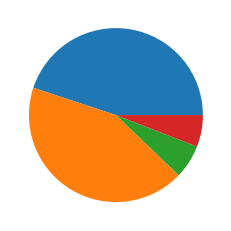

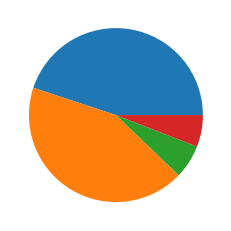

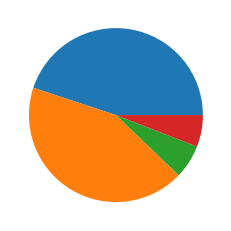

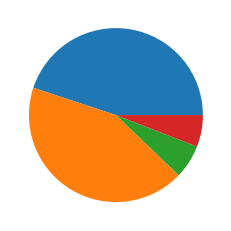

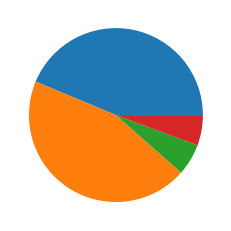

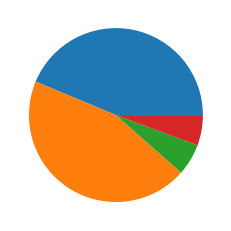

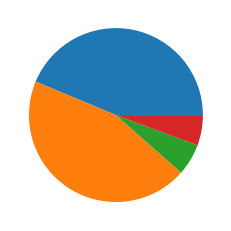

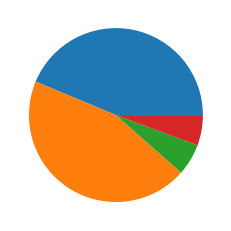

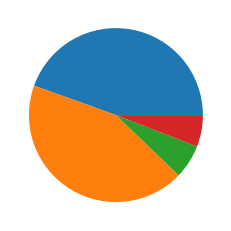

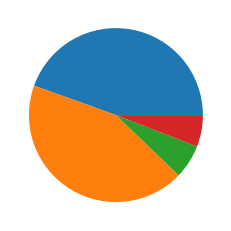

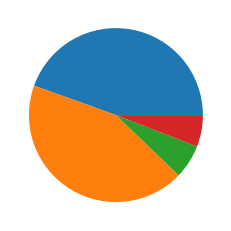

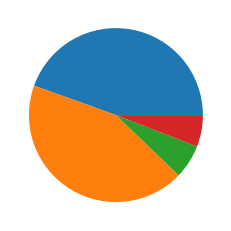

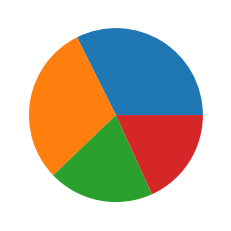

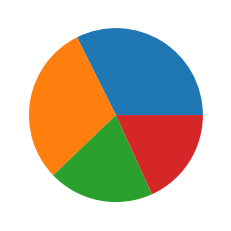

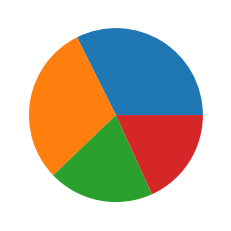

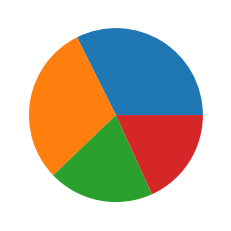

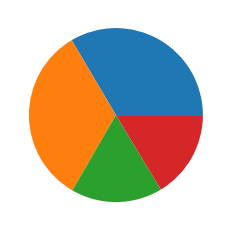

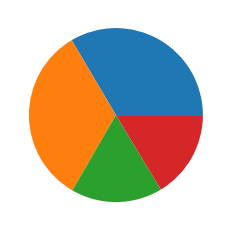

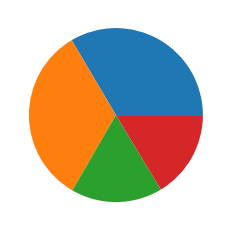

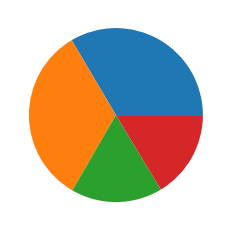

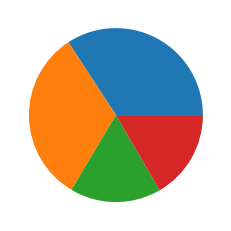

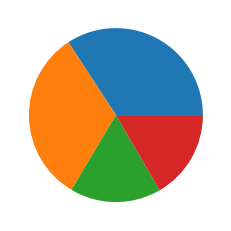

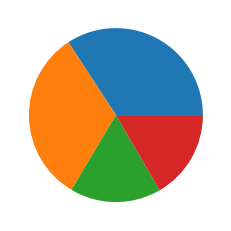

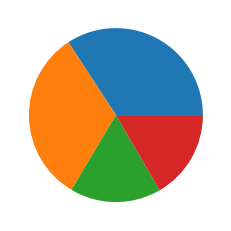

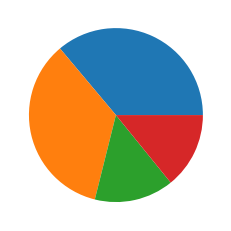

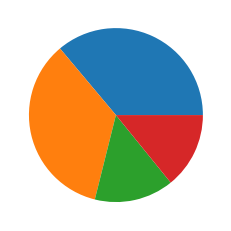

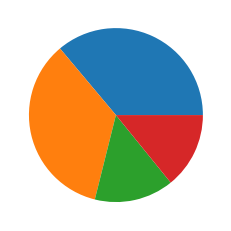

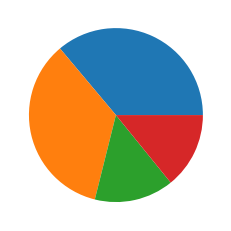

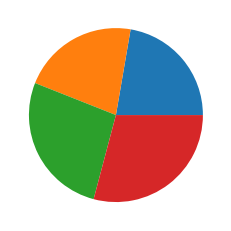

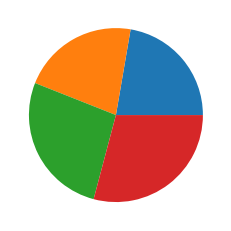

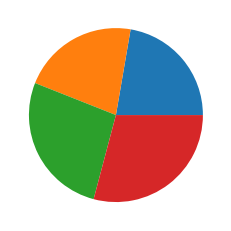

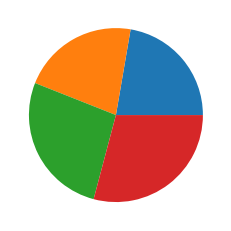

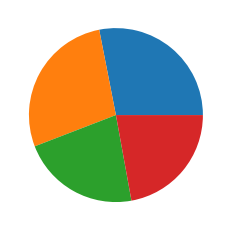

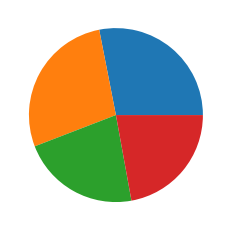

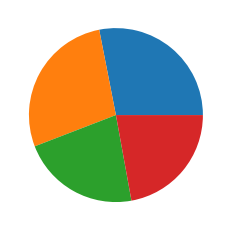

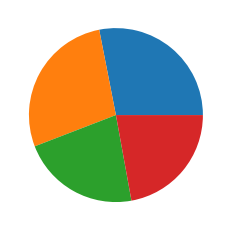

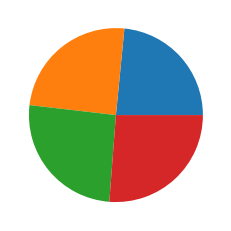

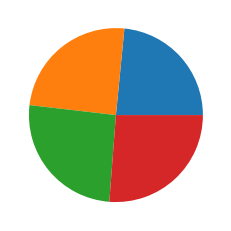

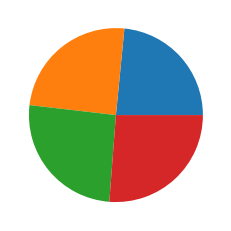

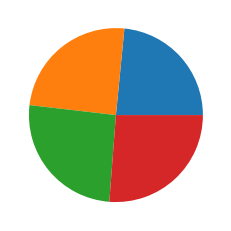

KeyboardInterrupt: ignored

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subway.csv')
data = csv.reader(f)
next(data)

population=[]
maxs_pop = [0] * 4
names_station = [''] * 4
labels = ['최고 유임 승차 인원', '최고 유임 하차 인원', '최고 무임 승차 인원', '최고 무임 하차 인원']

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
    if row[idx] > maxs_pop[idx-4]:
      maxs_pop[idx-4] = row[idx]
      #names_station[idx-4] = row[3] + "-" + row[1]
    plt.pie(row[4:])
    plt.show()


파이 차트를 화면만에 출력 하기 보다는 각각을 이미지 파일로 저장을 하겠습니다. 그리고 어떤 역에 대한 차트인지를 이미지 타이틀에 넣고 각각의 비율도 표현하도록 하겠습니다. **이 작업을 구글 코랩(colab)에서 실행시키면 상당한 시간이 소요됩니다.** 따라서 아래 코드를 실행시키지 말고 눈으로만 보고 다음으로 가셔도 좋습니다.

In [2]:
pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.6 MB/s eta 0:00:00


KeyboardInterrupt: ignored

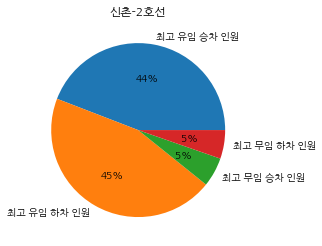

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subway.csv')
data = csv.reader(f)
next(data)

population=[]
maxs_pop = [0] * 4
names_station = [''] * 4
labels = ['최고 유임 승차 인원', '최고 유임 하차 인원', '최고 무임 승차 인원', '최고 무임 하차 인원']

for row in data:
  for idx in range(4,8):
    row[idx] = int(row[idx])
    if row[idx] > maxs_pop[idx-4]:
      maxs_pop[idx-4] = row[idx]
      #names_station[idx-4] = row[3] + "-" + row[1]
    plt.pie(row[4:], labels=labels, autopct='%1.f%%')
    plt.title(row[3] +'-'+row[1])
    plt.savefig(row[3] +'-'+row[1]+'.png')     
    #plt.savefig(row[3] +'-'+row[1]+'.png', dpi=200)     # dpi(Dots per Inch)는 생성될 이미지의 해상도
    plt.close()

#UNIT 12 - 지하철 시간대별 데이터 시각화 하기

- 출근 시간대에 사람들이 가장 많이 타고 내는 역은 어디일까요?
- 시간대 별로 가장 많은 사람들이 승하차 하는 역은 어디일까요?

##1. 지하철 시간대별 이용 현황 데이터 정제하기


UNIT 11에서 다운로드 받은 파일에서 "지하철 유무임별 이용현황" 탭에 있는 데이터만를 보면서 몇 가지 질물에 답을 찾는 연습을 해봤습니다. 

이번에는 다운로드 받은 파일의 "지하철 시간대별 이용현황" 탭에 있는 데이터를 활용해서 몇 가지 궁금증을 해결하겠습니다. 
"출근 시간대에 사람들이 가장 많이 타고 내리는 역은 어디일까?" 그리고 "시간대 별로 가장 많은 사람들이 승하차 하는 역은 어디일까?"에 대한 정보를 추츨해 보겠습니다. 

단계 1. 먼저, 마지막 탭, "지하철 시간대별 이용현황"를 선택합니다.  
단계 2. 파일 명, "subwaytime.csv"로 저장합니다. 
단계 3. "subwaytime.csv" 파일을 열어서 맥 마지막 열("작업 일시")을 삭제 합니다. 그런 다음 colab에 업로드 하세요.


단계 3. "subwaytime.csv" 파일을 읽어 옵니다.(subwaytime.csv 파일을 excel로 열어서 같이 보겠습니다)
첫 째 행과 두 째 행은 헤어부분이고 마지막 열('작업 일시')입니다. 새벽 4시부터 1시간 단위로 승차 인원과 하차 인원이 역별로 정리가 되어 있습니다. 시간대 별 승하차 인원 정보는 각 행의 인덱스 4부터 51까지입니다. 

In [6]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])

  # 데이터 전처리 결과 확인 --------------------
  print(row)

f.close()

['Jan-23', '1호선', '150', '서울역', 555, 27, 6560, 7430, 11059, 41800, 36434, 93151, 63029, 202219, 52580, 139333, 54340, 71568, 70370, 63901, 79634, 75747, 80020, 73989, 66182, 67327, 89582, 72003, 102705, 73714, 151337, 85479, 199627, 89122, 104878, 60753, 75312, 42075, 78469, 35664, 51553, 24666, 21933, 12316, 3388, 2777, 69, 235, 0, 5, 0, 0]
['Jan-23', '1호선', '151', '시청', 95, 0, 2103, 3753, 3123, 19320, 6859, 60501, 8173, 184328, 9615, 82438, 12041, 35900, 17962, 36576, 20148, 34129, 24288, 33198, 31376, 29226, 40530, 26343, 46960, 24462, 80282, 24668, 152460, 23279, 56004, 11948, 47529, 7707, 44866, 7006, 28432, 4998, 9485, 3160, 353, 703, 1, 22, 0, 0, 0, 0]
['Jan-23', '1호선', '152', '종각', 82, 2, 3427, 4474, 4126, 21088, 5752, 95993, 9031, 249263, 10920, 139709, 15416, 57240, 24362, 54448, 30366, 48016, 39219, 48212, 48939, 41486, 63383, 36889, 72690, 37849, 132987, 44160, 209664, 47416, 88738, 24403, 76068, 11405, 82420, 7793, 63327, 5373, 28764, 3476, 1215, 780, 10, 7, 0, 0, 0, 0]
['

##2. 출근 사간대 사람들이 가장 많이 타고 내리는 역은 어디일까?

출근 시간대에 사람들이 지하철역에 가장 많이 들어오고 나가는 시간은 몇 시일까요? 아침 7시에 얼마나 많은 사람이 지하철역에 들어오는지에 대한 정보는 인덱스 10 위치에 있네요. 

<참고>  
승차 시간 데이터는 지하철을 타는 시간을 측정한 것이 아니라 역에 교통카드를 찍고 들어오는 시간을 측정한 것입니다. 또 지금 우리가 가지고 있는 데이터로는 환승 인원을 확인할 수 없습니다. 

먼저, 아침 7시에 지하철 역으로 들어오는 사람의 수를 각 역마다 얼마나 되는지 파악하겠습니다. 



In [18]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[10 ])
  name_station.append( row[3] + '-'+row[1])
  
print(len(n_coming_station))
print(n_coming_station)

f.close()

612
[36434, 6859, 5752, 4454, 4823, 11183, 18129, 19395, 32353, 5788, 4912, 9165, 5271, 4109, 6027, 24108, 35684, 21995, 4994, 15079, 19415, 46591, 60252, 69065, 31447, 108094, 46688, 14334, 12737, 18024, 13538, 35416, 21629, 15925, 19545, 66120, 74412, 115473, 73687, 170489, 79142, 126701, 57799, 124404, 39403, 34372, 38230, 38732, 57425, 33468, 23852, 25696, 14353, 6805, 5599, 4463, 3029, 29795, 45231, 4570, 23460, 77513, 110977, 45391, 62865, 56643, 14435, 12498, 12346, 5222, 1489, 1907, 0, 5136, 20931, 22837, 19036, 13299, 10001, 9520, 23119, 7427, 25106, 28978, 14704, 7119, 20592, 3292, 23258, 19065, 29963, 17394, 20465, 22749, 35147, 77459, 45297, 74839, 111741, 100164, 40536, 80624, 78151, 40670, 26563, 15483, 4123, 6269, 8304, 5095, 4263, 11103, 16113, 6350, 10590, 10235, 1335, 41117, 63625, 1794, 9153, 11338, 19974, 14444, 21679, 35373, 7536, 21945, 32323, 13726, 39429, 33591, 30666, 78639, 23658, 82953, 17215, 25123, 61448, 38959, 62884, 41888, 14324, 44993, 8017, 10278, 1992

지하철 역의 개수는 612개이며 아침 7시(7시~7시 59분 59초)대에 각 역마다 역에 들어온 사람의 수를 확인했습니다. 

아침 7시 대에 역 마다 들어온 사람의 수를 그래프로 그려보겠습니다. 

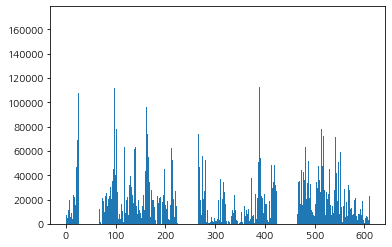

In [19]:
import matplotlib.pyplot as plt
plt.bar(range(len(n_coming_station)), n_coming_station)
plt.show()

7대에 역으로 들어오는 사람이 0명인 역이 있는 것 같아 보이네요. 그래프의 크기를 좀 키워서 다시 보겠습니다.

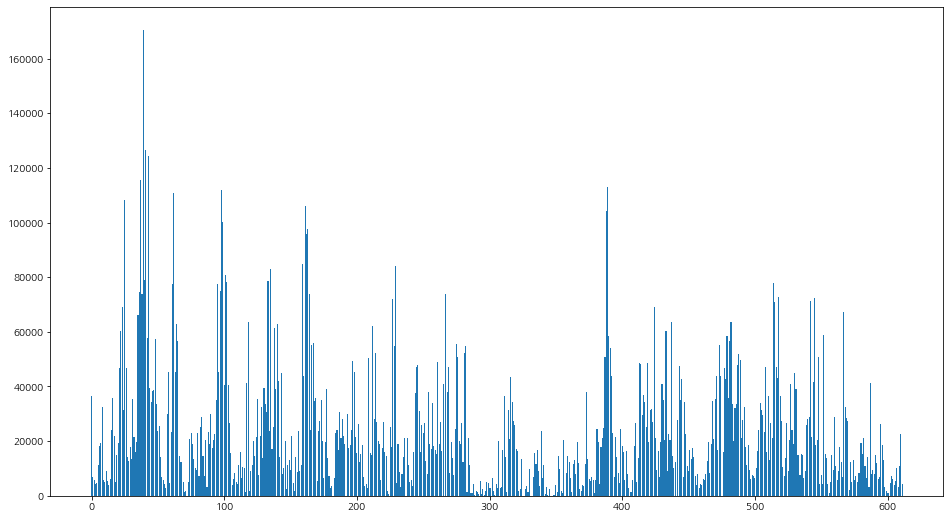

In [20]:
plt.figure(figsize=(16,9))
plt.bar(range(len(n_coming_station)), n_coming_station)
plt.show()

그래프를 확대 해서 보는 것 보다는 코드을 작성해서 확인하면 편이 더 좋겠습니다.

In [21]:
for idx in range(len(n_coming_station)):
  if n_coming_station[idx] == 0:
    print(name_station[idx] + ':', 0)

충무로-3호선: 0
창동-경원선: 0
복정-분당선: 0
임진강-경의선: 0
운천-경의선: 0
검암-경의선: 0
신내-6호선: 0


분당선 복정역은 아침 7시대에 역 개찰구를 통과해 들어온 사람이 2023년 1월 내내 한 명도 없었다? 믿기 어렵지만.... ㅠ.ㅠ

아무튼요. 위 그래프를 보고 알 수 있는 것은, 예상할 수 있었던 것과 같이, 역별로 아침 7시대에 역 개찰구 통과하여 들어온 사람들의 수는 편차가 심하다입니다. 그리고 유난히 사람의 수가 많은 역이 다수 보입니다. 




#####Quiz
7시대 가장 많이 사람이 들어온 역은 어느 역이며  과연 몇 명이나 들어온 것일까요?

In [22]:
max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('7시대 최대 인원이 들어온 역은 {}이고 인원수는 {}명입니다.'.format(name, max_n))

7시대 최대 인원이 들어온 역은 신림-2호선이고 인원수는 170489명입니다.


7시대만 살펴 볼 것이 아니라 일반적으로 출근 시간으로 볼 수 있는 7시부터 8시 59분 59초까지 살펴보도록 하겠습니다. 8시 59분 59초도 출근 시간이라고 봐야할지 모르겠지만 출근 시간이 다소 늦은 회사도 있을 수 있으니 넉넉하게 7시부터 9시미만까지의 시간대를 출근 시간대로 보고 각 역별로 얼마나 많은 사람들이 들어오는지 알아 보도록 하겠습니다. 위 코드셀에서 ```row[10]```에는 7시대 승차 인원이었습니다. 그렇다면 이번에는 7시대 승차 인원과 8시대 승차 인원의 합을 총 승차 인원으로 봐야할 것입니다. 

```python
row[10] + row[12]
```

In [23]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[10] + row[12])
  name_station.append( row[3] + '-'+row[1])
  
print(len(n_coming_station))
print(n_coming_station)

f.close()

612
[99463, 15032, 14783, 11671, 12815, 27782, 45444, 49257, 74349, 15779, 12014, 23740, 15253, 11935, 16705, 67743, 95009, 65022, 13031, 37564, 48757, 132831, 169028, 176200, 74274, 258306, 116872, 34609, 30389, 47763, 38166, 93337, 56456, 41948, 47769, 156883, 194086, 280900, 188379, 427338, 202110, 303361, 144991, 259259, 85064, 78998, 89612, 89389, 130957, 83336, 57867, 63179, 35108, 19402, 16477, 12577, 6507, 57347, 87205, 13306, 46428, 150130, 241277, 100847, 132550, 120381, 31473, 29401, 30706, 14149, 3863, 5367, 1, 12782, 56491, 57400, 47220, 34932, 25846, 24671, 62673, 19071, 65340, 70632, 33920, 16325, 44248, 7654, 55630, 41729, 71383, 37735, 45149, 50931, 67417, 143510, 93707, 145020, 227462, 210317, 87158, 169009, 156111, 87603, 59400, 34400, 9534, 15874, 22060, 13962, 11059, 24783, 39188, 15377, 25885, 24776, 3386, 94533, 138372, 4877, 29318, 29450, 50863, 36681, 50920, 88189, 16759, 52533, 65582, 27713, 77000, 64785, 58402, 145174, 44293, 162680, 33532, 50025, 108716, 681

이전과 마찬가지로 역의 개수는 612개 변화 없어야죠? 출근 시간대 각 역마다 승차 인원을 파악할 수 있네요.

#####Quiz
출근 시간대(7~9시 미만)에에 가장 많이 사람이 들어온 역은 어느 역이며  과연 몇 명이나 들어온 것일까요?

In [25]:
max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('출근 시간대에 최대 인원이 들어온 역은 {}이고 인원수는 {}명입니다.'.format(name, max_n))

7시대 최대 인원이 들어온 역은 신림-2호선이고 인원수는 427338명입니다.


전 신림역 근처에 살고 싶지 않습니다. ㅎㅎㅎㅎ

#####Quiz
출근 시간대를 7~10시 미만까지로 보고 그 시간에 승차한 인원이 가장 많은 역은 어디이며 몇 명이 승차했는지 파악하는 코드를 만들어 보세요.

In [29]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[10] + row[12] + row[14])
  name_station.append( row[3] + '('+row[1]+')')

f.close()

max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('출근 시간대에 최대 인원이 승차한 역은 {}이고 인원은 {}명입니다.'.format(name, max_n))

출근 시간대에 최대 인원이 승차한 역은 신림(2호선)이고 인원은 585758명입니다.


#####Quiz
출근 시간대를 오전 7시부터 10시 미만까지 넓게 보고 이 시구간에 가장 많은 사람이 하차한 역은 어느 역일까요?


In [30]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[11] + row[13] + row[15])
  name_station.append( row[3] + '('+row[1]+')')

f.close()

max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('출근 시간대에 최대 인원이 하차한 역은 {}이고 인원은 {}명입니다.'.format(name, max_n))

출근 시간대에 최대 인원이 하차한 역은 역삼(2호선)이고 인원은 785748명입니다.


서울 지리에 익숙하지 않으시다면 왜 역삼역에서 사람들이 많이 내리는지 잘 모르실 수 있습니다. 역삼동은 회사가 많은 지역입니다. 

##3. 밤 11시대에 사람들이 가장 많이 타는 역은 어디일까요?
밤 11시대(밤 11시부터 밤 11시 59분 59초까지, 즉 밤 12시 미만)에 지하철을 탄다는 것은 야근을 했거나 지인을 만나 좋은 시간을 보내고 귀가하는 게 아닐까 생각해 봅니다. 이 시간대에 가장 많은 사람들이 이용하는 역은 어디일까요? 어느 역에서 가장 많은 사람이 지하철에 승차할까요? 

밤 11시면 23시네요. 23시 0분 0초에서 23시 59분 59초에 승차하는 인원 수는 ```data```의 인덱스 46번째입니다. 새벽 4시대 승차 인원 정보는 인덱스 4였습니다. 
새벽 5시대 즉 05시 대 승차 인원은 정보는 인덱스 6 위치에 있습니다.  새벽 6시대 즉 06시 때 승차 인원 정보는 인덱스 8 위치에 있습니다. 한번 더 따져 보겠습니다. 7시대의 승차 인원 정보는 인덱스 10 위치에 있습니다.

<center>
시간대 별 승차인원 파악을 위한 인덱스

|시간대|인덱스|
|:-:|:-:|
|4|4|
|5|6|
|6|8|
|7|10|

</center>

위 표를 보고 시간대와 인덱스 사이의 관계를 식으로 유도할 수 있을까요?

$$index = 4 + (t-4) \times 2\tag{11-2}$$

식(11-2)를 정리하면 식(11-3)과 같이 표현할 수 있습니다.

$$index = 2t-4 \tag{11-3}$$ 

자 이제 11시대에 승차 인원이 가장 많은 역이 어디인지 찾는 코드를 작성하겠습니다.

In [33]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

t = 23        # 이 코드에서는 밤 11시를 23시라고 표현해야 함.

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[2*t-4] )
  name_station.append( row[3] + '('+row[1]+')')

f.close()

max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('밤 11시대에 최대 인원이 승차한 역은 {}이고 인원은 {}명입니다.'.format(name, max_n))

밤 11시대에 최대 인원이 승차한 역은 홍대입구(2호선)이고 인원은 90008명입니다.


#####Quiz
시간대를 입력하면 최대 인원이 승차한 역의 이름과 인원 수를 출력하는 코드를 작성하세요.

In [37]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_coming_station = []
name_station = []

t = input('시간대 별 가장 많은 사람이 승차한 역 이름을 알려드립니다. 시간대는? (예, 새벽 4는 4를 입력, 오후 1시는 13을 입력): ')
t = int(t)

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_coming_station.append( row[2*t-4] )
  name_station.append( row[3] + '('+row[1]+')')

f.close()

max_n = max(n_coming_station)
idx = n_coming_station.index(max_n)
name = name_station[idx]

print('{}시대에 최대 인원이 승차한 역은 {}이고 인원은 {}명입니다.'.format(t, name, max_n))

시간대 별 가장 많은 사람이 승차한 역 이름을 알려드립니다. 시간대는? (예, 새벽 4는 4를 입력, 오후 1시는 13을 입력): 18
18시대에 최대 인원이 승차한 역은 강남(2호선)이고 인원은 300509명입니다.


##4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까요?

저녁 6시부터 ~7시대(7시 59분 59초)에 하차하는 인원이 제일 많은 역은 어디일까요? 먼저 특정 시간대에 하차 인원이 제일 많은 역을 찾아 보겠습니다. 

<center>
시간대 별 하차인원 파악을 위한 인덱스

|시간대|인덱스|
|:-:|:-:|
|4|5|
|5|7|
|6|9|
|7|11|

</center>

위 표를 보고 식을 유도 해도 될 것 같습니다만 결국 시간대 별 인텍스의 값이 1 증가한 것이므로 식(11-2)의 좌변에 1을 더해 식(11-4)와 같이 표현하면 되겠습니다. 

$$index = 2t-3 \tag{11-4}$$ 

In [42]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
n_down_station = []
name_station = []

t = [18, 19]    #저녁 6시대, 저녁 7시대의 하차 인원 정보가 있는 인덱스

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  # 데이터 전처리 결과 확인 --------------------
  #print(row)

  n_down_station.append( row[2*t[0]-3] + row[2*t[1]-3]  )   #18시와 19시대 하차 인원 합
  name_station.append( row[3] + '('+row[1]+')')

f.close()

max_n = max(n_down_station)
idx = n_down_station.index(max_n)
name = name_station[idx]

print('{}시대에 최대 인원이 하차한 역은 {}이고 인원은 {}명입니다.'.format(t, name, max_n))

[18, 19]시대에 최대 인원이 하차한 역은 신림(2호선)이고 인원은 407712명입니다.


In [46]:
print( 89122 + 60735)
print( n_down_station[0] )


149857
149875


시간대 별로 사람들이 가장 많이 타는 역은 어디일까요? 새벽 4시대에는 어느 역에서 사람들이 가장 많이 탈까요? 새벽 5시대는 또 어느 역에서 사람들이 가장 많이 승차할까요? 새벽 4, 5시에 지하철은 탄다? 음~ 삶의 무게가 ㅠ.ㅠ

자 그럼 x 축에는 해당 시간대에 제일 많은 사람이 승차하는 지하철역 이름을 그리고 y축에는 승차 인원을 표시하는 그래프를 그려보겠습니다. 시간대는 0시대부터 23시대로 24개의 시간대를 고려하겠습니다. 우리가 가지고 있는 csv 파일을 보시면 코드에서 ```data```라고 표현했던 데이터를 어떻게 인덱싱해야 하는지 알 수 있습니다. 

식(11-3)과 같은 방식으로 인덱싱을 해서 시간 대별 승차 인원 정보를 추출하겠습니다.





In [61]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
max_ride_persion = [0] * 24
name_station = [''] * 24

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  for h in range(24):
    n_ride_persion = row[2*h+4]
    if n_ride_persion > max_ride_persion[h]:
      max_ride_persion[h] = n_ride_persion
      name_station[h] = row[3] + '('+row[1]+')'
f.close()

print( name_station[-1])
print(max_ride_persion[-1])

for name, persion in zip(name_station, max_ride_persion):
  print( name + ":" + str(persion) )


0
구로(경부선):9202
신림(2호선):34268
신림(2호선):63690
신림(2호선):170489
신림(2호선):256849
신림(2호선):158420
신림(2호선):85500
잠실(송파구청)(2호선):77283
잠실(송파구청)(2호선):87019
강남(2호선):97932
강남(2호선):108589
강남(2호선):135040
강남(2호선):157843
강남(2호선):231269
강남(2호선):300509
강남(2호선):204335
잠실(송파구청)(2호선):161641
강남(2호선):181108
강남(2호선):176597
홍대입구(2호선):90008
강남(2호선):14758
홍대입구(2호선):170
강남(2호선):2
:0


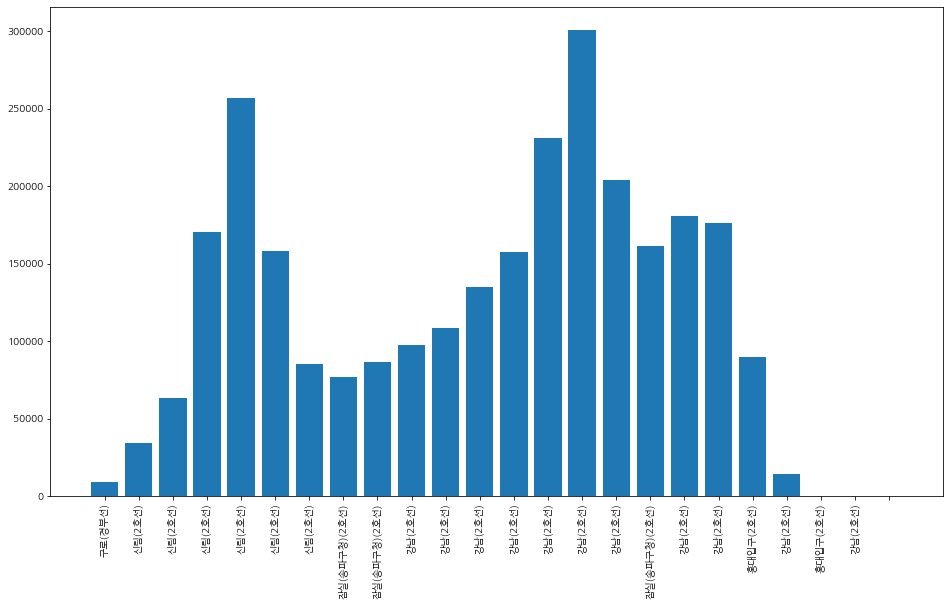

In [58]:
plt.figure(figsize=(16,9))
plt.bar(range(24), max_ride_persion)
plt.xticks(range(24), name_station, rotation=90)
plt.show()

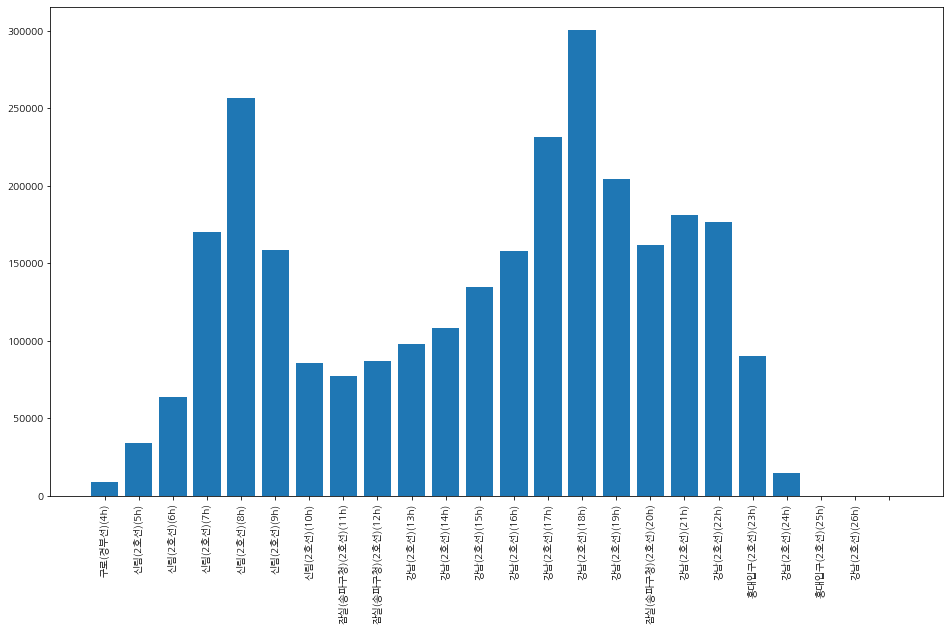

In [64]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
max_ride_persion = [0] * 24
name_station = [''] * 24

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  for h in range(24):
    n_ride_persion = row[2*h+4]
    if n_ride_persion > max_ride_persion[h]:
      max_ride_persion[h] = n_ride_persion
      name_station[h] = row[3] + '('+row[1]+')' + '('+str(h+4)+'h)'
      

f.close()

plt.figure(figsize=(16,9))
plt.bar(range(24), max_ride_persion)
plt.xticks(range(24), name_station, rotation=90)
plt.show()

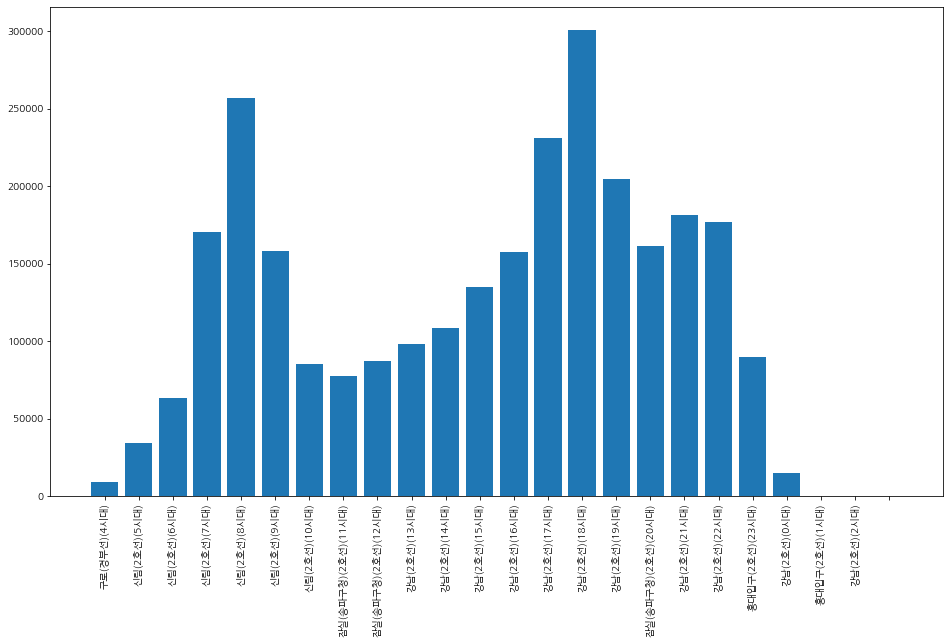

In [75]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
max_ride_persion = [0] * 24
name_station = [''] * 24

for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])
  
  for h in range(24):
    n_ride_persion = row[2*h+4]
    if n_ride_persion > max_ride_persion[h]:
      max_ride_persion[h] = n_ride_persion
      if h+4 < 24:
        name_station[h] = row[3] + '('+row[1]+')' + '('+str(h+4)+'시대)'
      else:
        name_station[h] = row[3] + '('+row[1]+')' + '('+str(h+4-24)+'시대)'
      

f.close()

plt.figure(figsize=(16,9))
plt.bar(range(24), max_ride_persion)
plt.xticks(range(24), name_station, rotation=90)
plt.show()


위 그래프는 시간대에 따라 승차 인원이 가장 많은 역과 승차 인원을 나타낸 바 차트입니다. 7~8시대, 출근 시간대에는 (2호선)신림역에서 승차하는 인원이 제일 많은 것으로 나타났으며, 오후 1시대, 2시대, 3시대...는 (2호선)강남역에서 승차하는 인원이 제일 많습니다. 강남역 일대는 주점도 많지만 회사 빌집 지역으로 볼 수 있습니다. 23시대(밤 11시대)에는 '홍대입구역'에서 승차하는 사람이 가장 많습니다. 

0시대는 역시 '강남역!'되겠습니다. 늦게 퇴근하는 직장인과 한 잔 하는 친구들이 늦은 귀가 하는 것 같네요.

#####Quiz
그런데 말입니다. 
x 축 라벨(역 이름)의 개수가 하나 하나 쉬어 보니 23개입니다. 24개가 나와야 하는 거 아닌가요? 하루는 24시간 따라서 시간대는 새벽 4시대부터 새벽 3시대까지 24개인데 왜 그래프로 오른쪽 끝이 저런 모양일까요? 역 이름도 없고 데이터고 없고. 

**"컴퓨터가 이상한 짓을 했습니다. 그건 누구 탓입니까?"**

우리가 그렇게 하라고 시킨 것입니다. 프로그래머가 프로그램한데로 동작한 것이기 때문에 프로그래머인 우리의 실수입니다.

**`그런가?`**

원인을 찾으십시요. 그리고 적절한 방벙으로 코드를 수정해서 그래프의 완성도를 높여 주세요. 아래 코드가 힌트입니다.
제일 먼저 원인을 찾아 코드를 적절하게 고치신 분게 소주 한잔 사고 싶습니다만 여러분께 **벌칙(?)**이되나요?

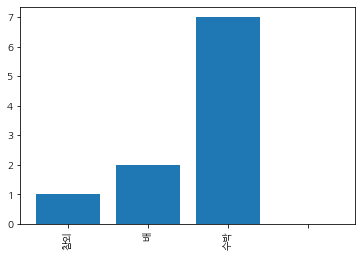

In [74]:
y = [1, 2, 7, 0]
plt.bar(range(4), y)
plt.xticks(range(4), ['참외', '배', '수박', ''], rotation=90)
plt.show()

##5. 모든 지하철역에 대해서 시간대 별로 승하차 인원(이용객)을 모두 더하면

시간대 별로 모든 지하철역의 승하차 인원을 다 더하면 시간대 별 전체 지하철 이용객 수가 될 것입니다. 서울시민들은 주로 어떤 시간대에 지하철을 많이 이용하는가를 판단하는데 도움이 될 수 있는 자료가 되겠네요.

'어떻게 그리지?'

먼저 역은 상관이 없으며 모든 역에서 승차인원을 합산하여 시간댈 승차 인원 그래프를 그리고 다음으로 역과는 시경 쓸 것 없고 시간대별 하차 인원을 

1. 데이터를 읽어 온다
2. 모든 역에 대해 시간대 별 승하차 인원을 누적 합산한다
3. 그래프를 그린다.

간다하네요.




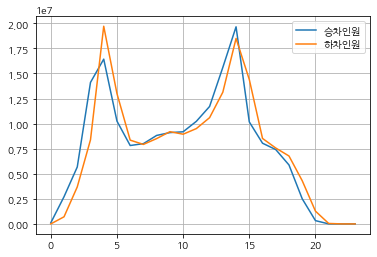

In [81]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
max_ride_persion = [0] * 24
name_station = [''] * 24

# 시간대별로 (승차) 인원을 합산해야하기 때문에 24개의 시간대 별로 합산값을 저장할 공간 하나 씩을 가져야함.
# 인덱스 0 위치에는 4시대의 (승차)인원을 역을 바꿔가면서 합산
persion_i = [0] * 24            
persion_o = [0] * 24            


for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])

  for h in range(24):             # 시간대별 계산 
    persion_i[h] += row[2*h+4]    # 시간대 별로 승차 인원을 합산. 인덱스 0에는 새벽 4시대 승차 인원을, 인덱스 1에는 새벽 5시대 승차 인원을, ..., 합산.
    persion_o[h] += row[2*h+5]    # 시간대 별로 하차 인원을 합산. 인덱스 0에는 새벽 4시대 하차 인원을, 인덱스 1에는 새벽 5시대 하차 인원을, ..., 합산.

f.close()

plt.plot(range(24), persion_i, label = '승차인원')
plt.plot(range(24), persion_o, label = '하차인원')
plt.legend()
plt.grid()
plt.show()

위 그래프의 x축은 시간이며 x 축에서 표시된 0은 새벽 4시대를 의미합니다. x 축에 표시된 5은 오전 9시대를 의미합니다. 아무래도 그래프의 가독성을 위해 위 코드를 수정하는 것이 좋겠습니다.

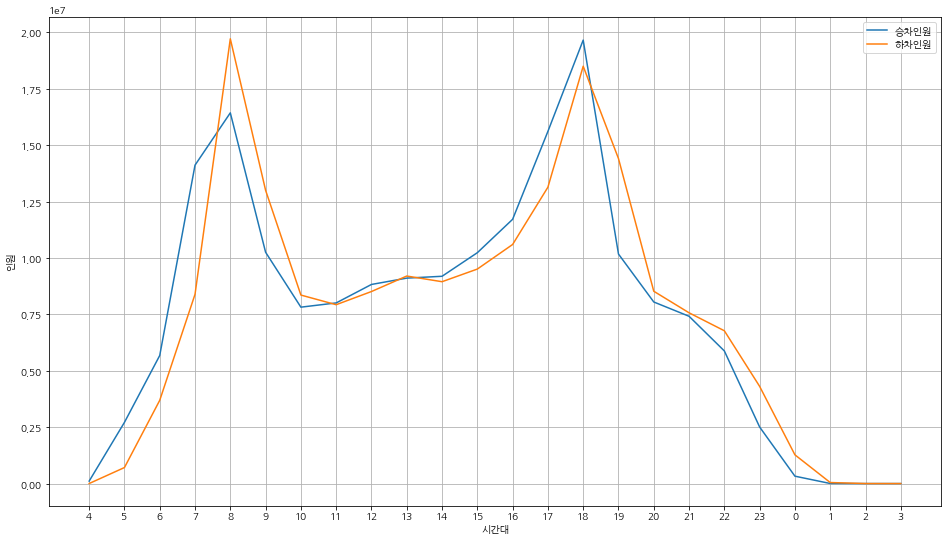

In [84]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('subwaytime.csv')
data = csv.reader(f)

# header 제거
next(data)
next(data)
max_ride_persion = [0] * 24
name_station = [''] * 24

# 시간대별로 (승차) 인원을 합산해야하기 때문에 24개의 시간대 별로 합산값을 저장할 공간 하나 씩을 가져야함.
# 인덱스 0 위치에는 4시대의 (승차)인원을 역을 바꿔가면서 합산
persion_i = [0] * 24            
persion_o = [0] * 24            


for row in data:
  # 데이터 전처리-------------------------------
  # 문자열 형태로 표현된 정수에서 자리 구분을 위한 쉼표(,) 제거
  for idx in range(4, len(row)):
    row[idx] = row[idx].replace(',','')

  # 문자열 데이터를 계산을 위해 정수로 변환  
  row[4:] = map(int, row[4:])

  for h in range(24):             # 시간대별 계산 
    persion_i[h] += row[2*h+4]    # 시간대 별로 승차 인원을 합산. 인덱스 0에는 새벽 4시대 승차 인원을, 인덱스 1에는 새벽 5시대 승차 인원을, ..., 합산.
    persion_o[h] += row[2*h+5]    # 시간대 별로 하차 인원을 합산. 인덱스 0에는 새벽 4시대 하차 인원을, 인덱스 1에는 새벽 5시대 하차 인원을, ..., 합산.

f.close()

plt.figure(figsize=(16,9))
plt.plot(range(24), persion_i, label = '승차인원')
plt.plot(range(24), persion_o, label = '하차인원')
plt.legend()

xlabels = []
for idx in range(24):
  label = idx + 4  
  if label < 24:
    xlabels.append(label)
  else:
    xlabels.append(label - 24)

plt.xticks(range(24), xlabels)
plt.xlabel('시간대')
plt.ylabel('인원')
plt.grid()
plt.show()

충분히 예상 가능한 결과를 얻었습니다. 다른 시간대와 달리 출근 시간대인 오전 7~8시대에 승하차 인원이 많고 오후 6~7시대도도 승하차 인원이 많은 것을 확인할 수 있습니다. 

참고로 위 그래프 왼쪽 상단에 $1e7$이라는 표현이 보입니다. $1e7 = 1\times 10^7$의 의미입니다. 10<sup>7</sup>이면 10,000,000이네요. 천만입니다. 즉 y축의 단위는 천만명이라는 이야기네요. 오전 8시대에 약 2천만명이 승차했네요. (너무 놀라지 마세요. 2023년 1월 합계치입니다.)

우리의 노력이 예상 가능한 결과를 얻었기 때문에 의미가 없는 것은 아닙니다. 뻔히 짐작이 되는 것을 굳이 이렇게까지 해서 구할 필요가 있는가 하는 생각을 하실 수 있는데, 사람들에게 주장하거나 논리를 펼쳐 나갈 때 쉽게 짐작할 수 있는 내용이라고 해서 '개인의 짐작'만 가지고 주장을 해나갈 수 없습니다. 신뢰성 있는 데이터에 근거하여 주장을 해야합니다.

---


# 부산 지하철 데이터 분석은 안해?
아 해야죠! 우리 나라에서 두 번째로 큰 도시인데 부산 지하철 데이터 분석 해야죠.


1. 앞서 활용한 자료와 같이 부산 지하철 승하차 인원 등에 대한 자료를 어디에서 구해야 할까요? 모른면 인터넷 검색을... ^^
2. 여기서 구할 수 있네요. \[[부산교통공사](https://www.humetro.busan.kr/default/main.do)\] 홈페이지에 접속합니다.
3. '어디에 있을까?' 고민하면서, '자료실' 메뉴를 찾았습니다. 
<center>

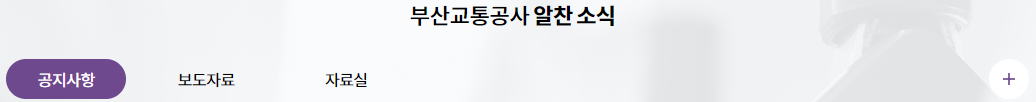
</center>


이 강의 자료를 만들고 있는 오늘은 2023년 2월 25일입니다. 그래서 아래와 같이 2023년 1월 수송수입 실적이 보이는데, 여러 분이 언제 이 사이트에 접속하느냐에 따라 ...

<center>

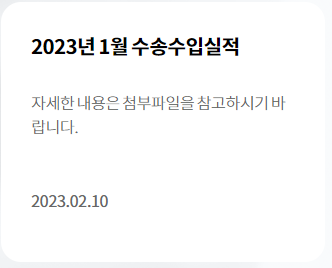
</center>

위에서 "2023년 1월 수송수입실적"을 클릭하시면 "첨부파일"이라는 것이 보이고 '아 저 파일을 다운로드 하면 되겠구나!'하는 생각이 드실 겁니다. 그거 맞습니다. 클릭해서 다운로드 하겠습니다.

1. 다운로드 받은 파일을 열어 보면, 4개의 탭으로 sheet가 구분되어 있는데 그중 "역별승하차" 택을 클릭합니다. 
2. 다른 이름으로 저장하기를 선택하셔서 파일 이름은 'busan_subwary'로 하고 확장자는 csv로 해서 저장을 하십시요. 
3. 현재 열린 excel 창을 닫으십시요.
4. 다운로드 폴더에 있는 busan_subway.csv 파일을 오픈하세요.

<center>

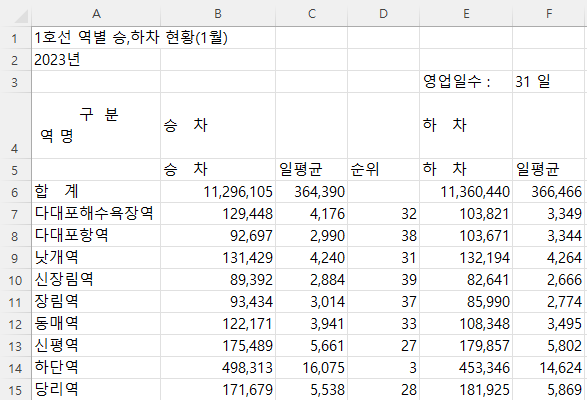
</center>






위와 유사한 모양이 보일 것입니다. 앞서 서울 지하철 데이터를 활용해서 몇 가지를 데이터 분석했던 경험을 기반으로 부산 지하철 데이터 분석을 해보겠습니다. 쉬운 것 부터 해보시죠.

#####Quiz
'busan_subwary.scv'파일을 열어서 불필요한 헤더를 삭제 하고 각 행의 데이터를 출력해 보십시요.

In [85]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('busan_subway.csv')
data = csv.reader(f)

for row in data:
  print(row)


['\ufeff"1호선 역별 승', '하차 현황(1월)"', '', '', '', '', '', '', '1호선 역별 승,하차 현황(2월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(3월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(4월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(5월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(6월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(7월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(8월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(9월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(10월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(11월)', '', '', '', '', '', '', '1호선 역별 승,하차 현황(12월)', '', '', '', '', '', '', '2023년 1호선 역별 승,하차 현황', '', '', '', '', '', '', '', '']
['2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', '', '', '', '', '', '2023년', '', 

해당 csv 파일을 열어서 각 행을 읽어 온 것 같기는 한데 출력 결과를 보니 이상합니다. 

excel로 busan_subway.csv 파일을 열어 살펴 보겠습니다. 이 파일에 담긴 내용 중 2023년 1월의 1호선 데이터만 먼저 살펴 보려고 한다면 행을 어디서부터 어디까지 짤라 내야할까요? 그리고 열은 어디서부터 어디까지 고려해야할까요? excel을 사용해보신 경험이 있다면 excel 파일에서 편집하시는 것이 더 편할 수 있습니다. 

여기서는 python 코드로 필요한 부분만 추출하도록 하겠습니다.

In [87]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('busan_subway.csv')
data = csv.reader(f)

for i in range(4):    #헤더 네 줄 제거
  next(data)

for row in data:
  mrow = row[:6]      #행을 기준으로, 인덱스 0(A열), 인덱스 1(B열), ..., 인덱스 5(F열)까지만 먼저 분리하겠음.
  print(mrow)

f.close()

['', '승   차', '일평균', '순위', '하   차', '일평균']
['합   계', '11,296,105 ', '364,390 ', '', '11,360,440 ', '366,466 ']
['다대포해수욕장역', '129,448 ', '4,176 ', '32 ', '103,821 ', '3,349 ']
['다대포항역', '92,697 ', '2,990 ', '38 ', '103,671 ', '3,344 ']
['낫개역', '131,429 ', '4,240 ', '31 ', '132,194 ', '4,264 ']
['신장림역', '89,392 ', '2,884 ', '39 ', '82,641 ', '2,666 ']
['장림역', '93,434 ', '3,014 ', '37 ', '85,990 ', '2,774 ']
['동매역', '122,171 ', '3,941 ', '33 ', '108,348 ', '3,495 ']
['신평역', '175,489 ', '5,661 ', '27 ', '179,857 ', '5,802 ']
['하단역', '498,313 ', '16,075 ', '3 ', '453,346 ', '14,624 ']
['당리역', '171,679 ', '5,538 ', '28 ', '181,925 ', '5,869 ']
['사하역', '115,572 ', '3,728 ', '34 ', '100,983 ', '3,258 ']
['괴정역', '244,906 ', '7,900 ', '21 ', '244,620 ', '7,891 ']
['대티역', '103,118 ', '3,326 ', '36 ', '98,456 ', '3,176 ']
['서대신역', '87,287 ', '2,816 ', '40 ', '89,987 ', '2,903 ']
['동대신역', '179,536 ', '5,791 ', '26 ', '159,318 ', '5,139 ']
['토성역', '219,291 ', '7,074 ', '23 ', '212,247 ', '6,847 ']
[

In [88]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('busan_subway.csv')
data = csv.reader(f)

for i in range(6):    #헤더 제거, "합계"를 포함하여 6줄의 헤더 삭제
  next(data)

for row in data:
  mrow = row[:6]      #행을 기준으로, 인덱스 0(A열), 인덱스 1(B열), ..., 인덱스 5(F열)까지만 먼저 분리하겠음.
  print(mrow)

f.close()

['다대포해수욕장역', '129,448 ', '4,176 ', '32 ', '103,821 ', '3,349 ']
['다대포항역', '92,697 ', '2,990 ', '38 ', '103,671 ', '3,344 ']
['낫개역', '131,429 ', '4,240 ', '31 ', '132,194 ', '4,264 ']
['신장림역', '89,392 ', '2,884 ', '39 ', '82,641 ', '2,666 ']
['장림역', '93,434 ', '3,014 ', '37 ', '85,990 ', '2,774 ']
['동매역', '122,171 ', '3,941 ', '33 ', '108,348 ', '3,495 ']
['신평역', '175,489 ', '5,661 ', '27 ', '179,857 ', '5,802 ']
['하단역', '498,313 ', '16,075 ', '3 ', '453,346 ', '14,624 ']
['당리역', '171,679 ', '5,538 ', '28 ', '181,925 ', '5,869 ']
['사하역', '115,572 ', '3,728 ', '34 ', '100,983 ', '3,258 ']
['괴정역', '244,906 ', '7,900 ', '21 ', '244,620 ', '7,891 ']
['대티역', '103,118 ', '3,326 ', '36 ', '98,456 ', '3,176 ']
['서대신역', '87,287 ', '2,816 ', '40 ', '89,987 ', '2,903 ']
['동대신역', '179,536 ', '5,791 ', '26 ', '159,318 ', '5,139 ']
['토성역', '219,291 ', '7,074 ', '23 ', '212,247 ', '6,847 ']
['자갈치역', '494,660 ', '15,957 ', '4 ', '506,916 ', '16,352 ']
['남포역', '471,926 ', '15,223 ', '6 ', '512,113 ', '1

In [89]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('busan_subway.csv')
data = csv.reader(f)

for i in range(6):    #헤더 제거, "합계"를 포함하여 6줄의 헤더 삭제
  next(data)

for row in data:
  mrow = row[:6]      #행을 기준으로, 인덱스 0(A열), 인덱스 1(B열), ..., 인덱스 5(F열)까지만 먼저 분리하겠음.
  if(mrow[0] ==''):
    break
  print(mrow)


f.close()

['다대포해수욕장역', '129,448 ', '4,176 ', '32 ', '103,821 ', '3,349 ']
['다대포항역', '92,697 ', '2,990 ', '38 ', '103,671 ', '3,344 ']
['낫개역', '131,429 ', '4,240 ', '31 ', '132,194 ', '4,264 ']
['신장림역', '89,392 ', '2,884 ', '39 ', '82,641 ', '2,666 ']
['장림역', '93,434 ', '3,014 ', '37 ', '85,990 ', '2,774 ']
['동매역', '122,171 ', '3,941 ', '33 ', '108,348 ', '3,495 ']
['신평역', '175,489 ', '5,661 ', '27 ', '179,857 ', '5,802 ']
['하단역', '498,313 ', '16,075 ', '3 ', '453,346 ', '14,624 ']
['당리역', '171,679 ', '5,538 ', '28 ', '181,925 ', '5,869 ']
['사하역', '115,572 ', '3,728 ', '34 ', '100,983 ', '3,258 ']
['괴정역', '244,906 ', '7,900 ', '21 ', '244,620 ', '7,891 ']
['대티역', '103,118 ', '3,326 ', '36 ', '98,456 ', '3,176 ']
['서대신역', '87,287 ', '2,816 ', '40 ', '89,987 ', '2,903 ']
['동대신역', '179,536 ', '5,791 ', '26 ', '159,318 ', '5,139 ']
['토성역', '219,291 ', '7,074 ', '23 ', '212,247 ', '6,847 ']
['자갈치역', '494,660 ', '15,957 ', '4 ', '506,916 ', '16,352 ']
['남포역', '471,926 ', '15,223 ', '6 ', '512,113 ', '1